In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd "/content/drive/MyDrive/pic"

/content/drive/MyDrive/pic


In [ ]:
import shutil

fnames = os.listdir('/content/drive/MyDrive/pic/train/cat')
cat_fname = fnames[:12501]
for fname in cat_fname:
  src = os.path.join('/content/drive/MyDrive/pic/train', fname)
  dst = os.path.join('/content/drive/MyDrive/pic/train/cat', fname)
  shutil.move(src, dst)

In [ ]:
fnames = os.listdir('/content/drive/MyDrive/pic/train/dog')
dog_fname = fnames[:]
for fname in dog_fname:
  src = os.path.join('/content/drive/MyDrive/pic/train', fname)
  dst = os.path.join('/content/drive/MyDrive/pic/train/dog', fname)
  shutil.move(src, dst)

In [17]:
print(len(os.listdir('/content/drive/MyDrive/pic/train/cat')))

12501


In [16]:
print(len(os.listdir('/content/drive/MyDrive/pic/train/dog')))

12500


In [18]:
os.remove('/content/drive/MyDrive/pic/train/cat/dog.0.jpg')

In [19]:
print(len(os.listdir('/content/drive/MyDrive/pic/train/cat')))

12500


In [20]:
print(len(os.listdir('/content/drive/MyDrive/pic/train/dog')))

12500


In [ ]:
import tensorflow as tf
import os
import numpy as np
import PIL

from PIL import Image
from glob import glob

root = 'train/'
training_images = []
training_labels = []

for filename in glob(root +"*"):
    for img in glob(filename + "/*.jpg"):
        an_img = PIL.Image.open(img)
        img_array = np.array(an_img)
        training_images.append(img_array)
        label = filename.split('/')[1]
        training_labels.append(label)
  
training_images = np.array(training_images)
training_labels = np.array(training_labels)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
training_labels= le.fit_transform(training_labels)
training_labels = training_labels.reshape(-1,1)

print(training_images.shape)
print(training_labels.shape)

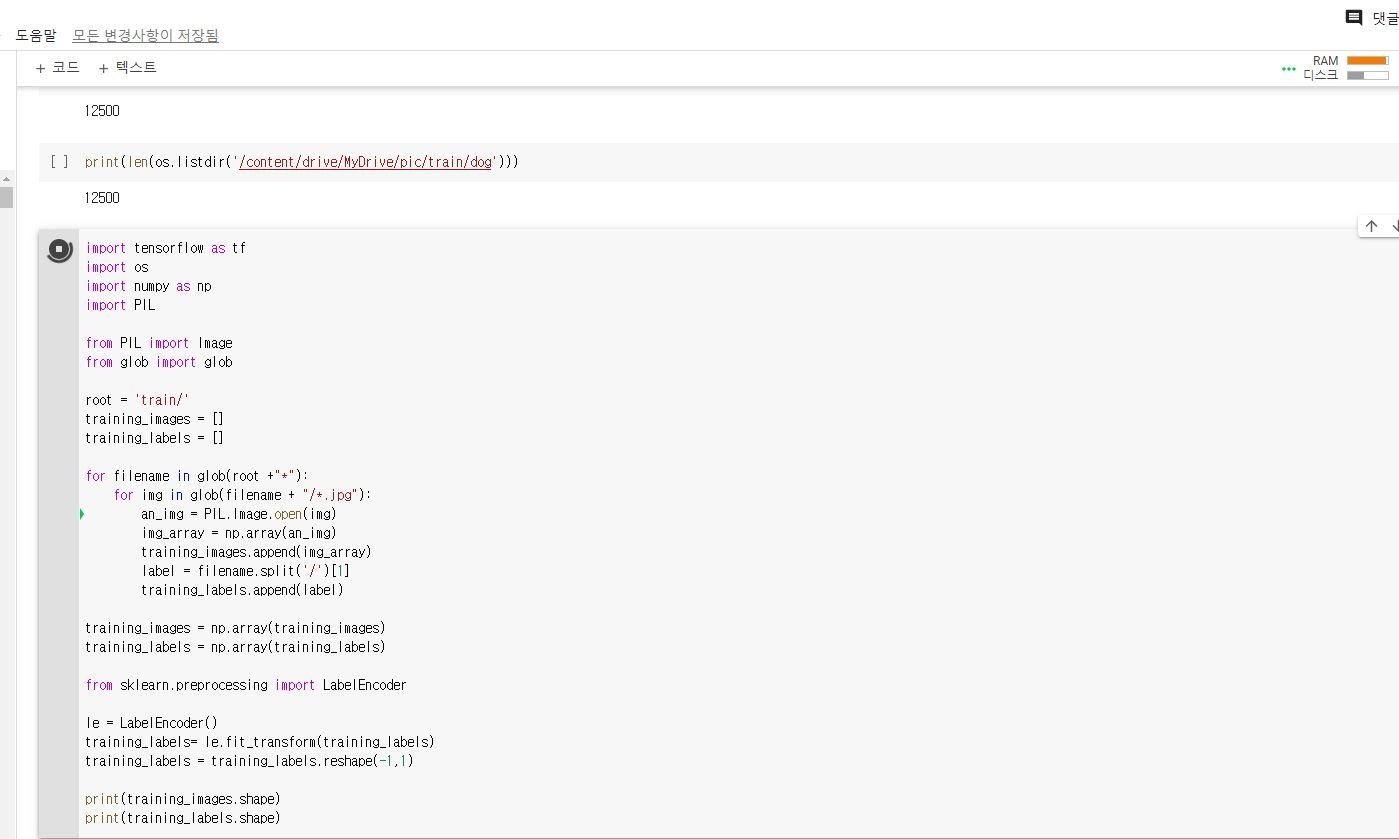